In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm
import os
import cv2
import shutil

In [73]:
!ls

Analysing.ipynb      cars_test.zip	 dataset2.zip	    Untitled1.ipynb
cardatasettest.csv   cars_train		 dataset_final.zip  Untitled2.ipynb
cardatasettrain.csv  cars_train.zip	 datasets.zip	    Untitled.ipynb
cars_annos.mat	     classification	 dataset.yaml	    Yolov8.ipynb
cars_test	     classification.zip  Modeling.ipynb     Yolov8v2.ipynb


### Actual annotation file have coordinate issue, so I found this csv file, in train csv file, coordinates has be recorrected, but test csv file looks wrong as filename is not correct as well as ground truth label is missing

In [74]:
df_train=pd.read_csv("cardatasettrain.csv")


In [75]:
df_test=pd.read_csv("cardatasettest.csv")

In [76]:
df_train["Class"]=df_train["Class"]-1

In [77]:
df_test

,Unnamed: 0,x1,y1,x2,y2,image
0,0,30,52,246,147,00001.jpg
1,1,100,19,576,203,00002.jpg
2,2,51,105,968,659,00003.jpg
3,3,67,84,581,407,00004.jpg
4,4,140,151,593,339,00005.jpg
...,...,...,...,...,...,...
8036,8036,49,57,1169,669,08037.jpg
8037,8037,23,18,640,459,08038.jpg
8038,8038,33,27,602,252,08039.jpg
8039,8039,33,142,521,376,08040.jpg


### creating a dataframe for width and height of images, so that we can create the annotation as per Yolov11 format

In [78]:
test_path="cars_test/cars_test"
train_path="cars_train/cars_train"
allfiles=os.listdir(train_path)
allfiles_test=os.listdir(test_path)

In [79]:
shapedata=[]
for i in tqdm(allfiles):
    img=cv2.imread(train_path+"/"+i)
    h,w,c=img.shape
    shapedata.append({"path":train_path,"image":i.strip(),"height":h,"width":w})

100%|██████████████████████████████████████| 8144/8144 [00:30<00:00, 266.43it/s]


In [80]:
df_meta_train=pd.DataFrame(shapedata)

In [81]:

shapedata_test=[]
for i in tqdm(allfiles_test):
    img=cv2.imread(test_path+"/"+i)
    h,w,c=img.shape
    shapedata_test.append({"path":test_path,"image":i.strip(),"height":h,"width":w})

100%|███████████████████████████████████████| 8041/8041 [03:05<00:00, 43.28it/s]


In [82]:
df_meta_test=pd.DataFrame(shapedata_test)

In [83]:
df_meta_test

,path,image,height,width
0,cars_test/cars_test,03558.jpg,480,640
1,cars_test/cars_test,03398.jpg,200,300
2,cars_test/cars_test,02333.jpg,853,1280
3,cars_test/cars_test,01634.jpg,192,262
4,cars_test/cars_test,06053.jpg,91,121
...,...,...,...,...
8036,cars_test/cars_test,03152.jpg,182,500
8037,cars_test/cars_test,01282.jpg,768,1024
8038,cars_test/cars_test,01239.jpg,221,300
8039,cars_test/cars_test,04854.jpg,480,640


In [84]:
df_train=pd.merge(df_train, df_meta_train, on='image', how='left')


In [85]:
df_test=pd.merge(df_test, df_meta_train, on='image', how='left')

<Axes: xlabel='Class', ylabel='count'>

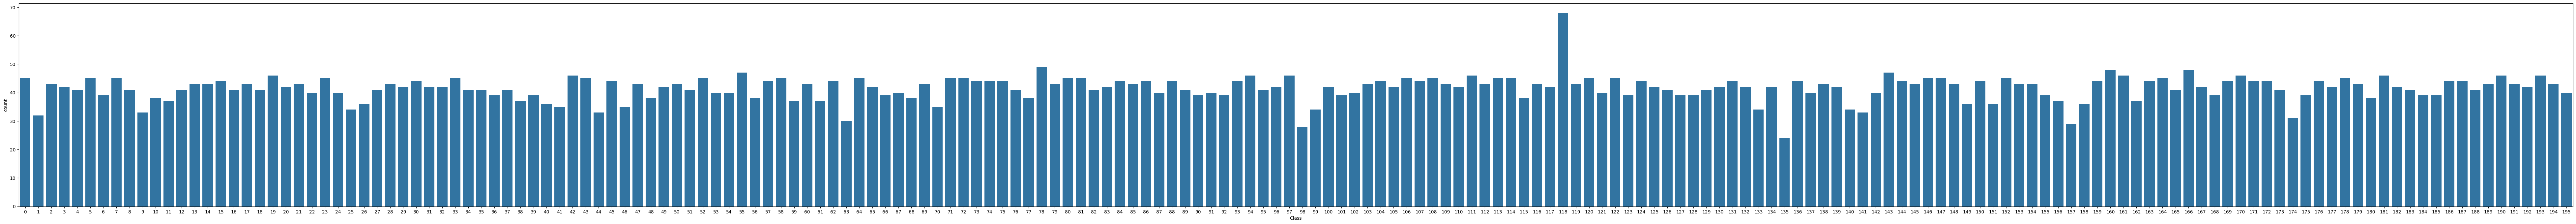

In [86]:
plt.figure(figsize=(100,8))
sns.countplot(data=df_train,x=df_train["Class"])

### create annotation as per format of Yolov11, i.e centre_x, centre_y, h, and w of object

In [87]:
df_train["centre_x"]=df_train.apply(lambda x: (x.x1+x.x2)/(2*x.width),axis=1)
df_train["centre_y"]=df_train.apply(lambda x: (x.y1+x.y2)/(2*x.height),axis=1)
df_train["w"]=df_train.apply(lambda x: (x.x2-x.x1)/(x.width),axis=1)
df_train["h"]=df_train.apply(lambda x: (x.y2-x.y1)/(x.height),axis=1)

In [88]:
df_train[df_train["h"]>1]

,Unnamed: 0,x1,y1,x2,y2,Class,image,path,height,width,centre_x,centre_y,w,h


In [89]:
df_test["centre_x"]=df_test.apply(lambda x: (x.x1+x.x2)/(2*x.width),axis=1)
df_test["centre_y"]=df_test.apply(lambda x: (x.y1+x.y2)/(2*x.height),axis=1)
df_test["w"]=df_test.apply(lambda x: (x.x2-x.x1)/(x.width),axis=1)
df_test["h"]=df_test.apply(lambda x: (x.y2-x.y1)/(x.height),axis=1)

### Visualizing train image

In [121]:
annotdf=df_train.sample(10)

In [149]:
def annotaion(x1,y1,x2,y2,name,classid):
    position = (x1, y1)
    font = cv2.FONT_HERSHEY_SIMPLEX 
    font_scale = 1 
    color = (255, 0, 0) 
    thickness = 2 
    img=cv2.imread("cars_train/cars_train/"+name)
    img=cv2.rectangle(img,(x1,y1),(x2,y2),thickness=1,color=(255,255,0))
    img=cv2.putText(img, str(classid), position, font, font_scale, color, thickness)
    if img is None:
        return
    plt.figure(figsize=(5,8))
    print(type(img))
    plt.imshow(img)
    

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


[ WARN:0@12267.232] global loadsave.cpp:241 findDecoder imread_('cars_train/cars_train/06806.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12267.233] global loadsave.cpp:241 findDecoder imread_('cars_train/cars_train/04765.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12267.275] global loadsave.cpp:241 findDecoder imread_('cars_train/cars_train/00041.jpg'): can't open/read file: check file path/integrity


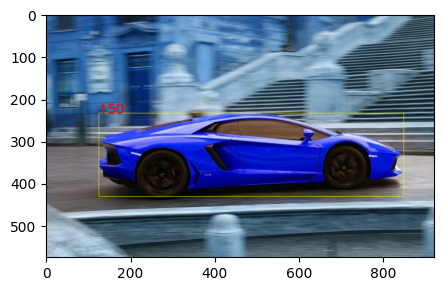

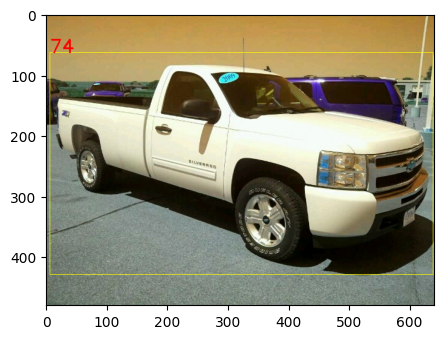

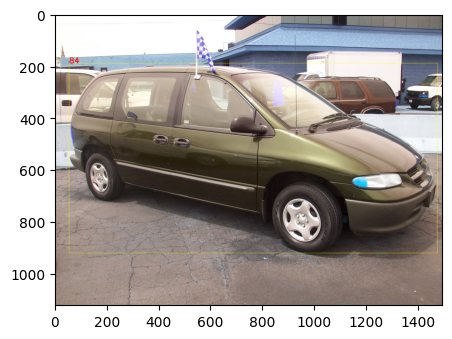

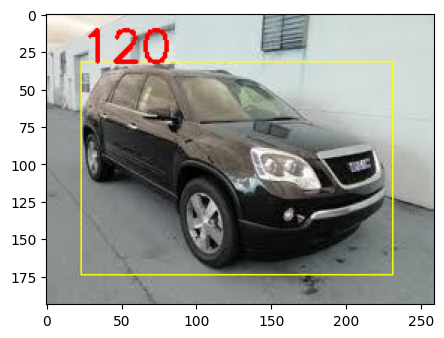

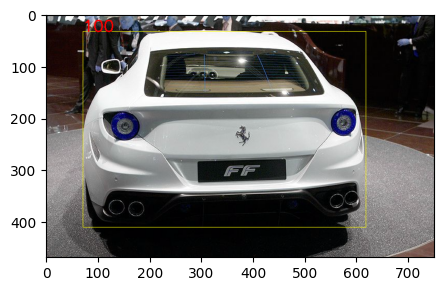

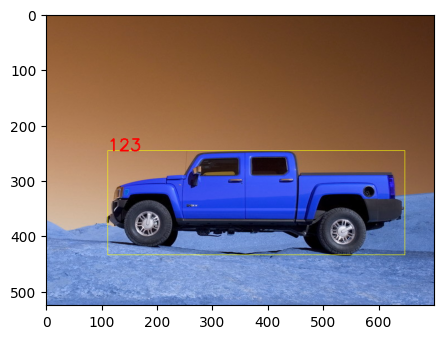

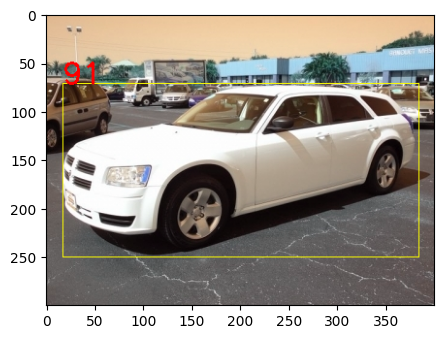

In [150]:
for i in annotdf.iterrows():
    x1=int(i[1]["x1"])
    x2=int(i[1]["x2"])
    y1=int(i[1]["y1"])
    y2=int(i[1]["y2"])
    name=i[1]["image"]
    classid=int(i[1]["Class"])
    try:
        annotaion(x1,y1,x2,y2,name,classid)
    except:
        pass

## Handling class imbalance

### We ar keeping 68 images as threshold, basically we are trying to maintain 68 images for each class. If class have less than 68 image, we will augment the image by 68-no_of_class image. For Augmentation, we are using Albumenations library, and we are augmenting images with blur, optical distortion, Grid Distortion and Hue Satureation

In [90]:
import albumentations as A

In [91]:
counterdict=dict(Counter(df_train["Class"]))

#### 119 class have around 68 imges, which is much higher than others

In [92]:
transform = A.Compose([
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
])

In [95]:
list_res=[]
for ki, vi in tqdm(counterdict.items()):
#     print(vi)
    samplenum=68-vi
    try:
        namelist=df_train[df_train["Class"]==ki].sample(samplenum)
    except:
        namelist=df_train[df_train["Class"]==ki].sample(vi)
        
#     if vi<30:
#         namelist=df_train[df_train["Class"]==ki]
#     elif vi>30 and vi<40:
#         namelist=df_train[df_train["Class"]==ki].sample(20)
#     elif vi>40 and vi<50:
#         namelist=df_train[df_train["Class"]==ki].sample(10)
#     elif vi>50 and vi<60:
#         namelist=df_train[df_train["Class"]==ki].sample(5)
            
    for rows in namelist.iterrows():
        dict_aug={}
        name=rows[1]["image"]
        x1=rows[1]["x1"]
        y1=rows[1]["y1"]
        x2=rows[1]["x2"]
        y2=rows[1]["y2"]
        class_=rows[1]["Class"]

#         image=rows[1]["image"]

        path=rows[1]["path"]
        height=rows[1]["height"]
        width=rows[1]["width"]
        centre_x=rows[1]["centre_x"]
        centre_y=rows[1]["centre_y"]
        w=rows[1]["w"]
        h=rows[1]["h"]


        img=cv2.imread(f"cars_train/cars_train/{name}")
        augmented_image = transform(image=img)['image']
        cv2.imwrite("cars_train/cars_train/"+name.split(".")[0]+"_aug.jpg",augmented_image)
        dict_aug["image"]=name.split(".")[0]+"_aug.jpg"
        dict_aug["x1"]=x1
        dict_aug["y1"]=y1
        dict_aug["x2"]=x2
        dict_aug["y2"]=y2
        
        dict_aug["Class"]=class_
        dict_aug["path"]=path
        dict_aug["height"]=height
        dict_aug["width"]=width
        dict_aug["centre_x"]=centre_x
        dict_aug["centre_y"]=centre_y
        dict_aug["w"]=w
        dict_aug["h"]=h
        list_res.append(dict_aug)
        
            

100%|█████████████████████████████████████████| 196/196 [01:19<00:00,  2.47it/s]


In [96]:
df_aug=pd.DataFrame(list_res)

In [97]:
df_aug.head(2)

,image,x1,y1,x2,y2,Class,path,height,width,centre_x,centre_y,w,h
0,04753_aug.jpg,53,103,483,379,13,cars_train/cars_train,480,640,0.418750,0.502083,0.671875,0.575000
1,04537_aug.jpg,160,203,1363,810,13,cars_train/cars_train,938,1500,0.507667,0.539979,0.802000,0.647122


In [98]:
try:
    del df_train["Unnamed: 0"]
except:
    pass

In [99]:
df_concat_train=pd.concat([df_train,df_aug])

In [100]:
df_concat_train[df_concat_train["centre_y"]>1]

,x1,y1,x2,y2,Class,image,path,height,width,centre_x,centre_y,w,h


#### We have used augmentation to handle class imbalance, still few classes are short, but good enough to train our Yolov11 model, Yolov11 also uses distributed focal loss to handle class imbalance


<Axes: xlabel='Class', ylabel='count'>

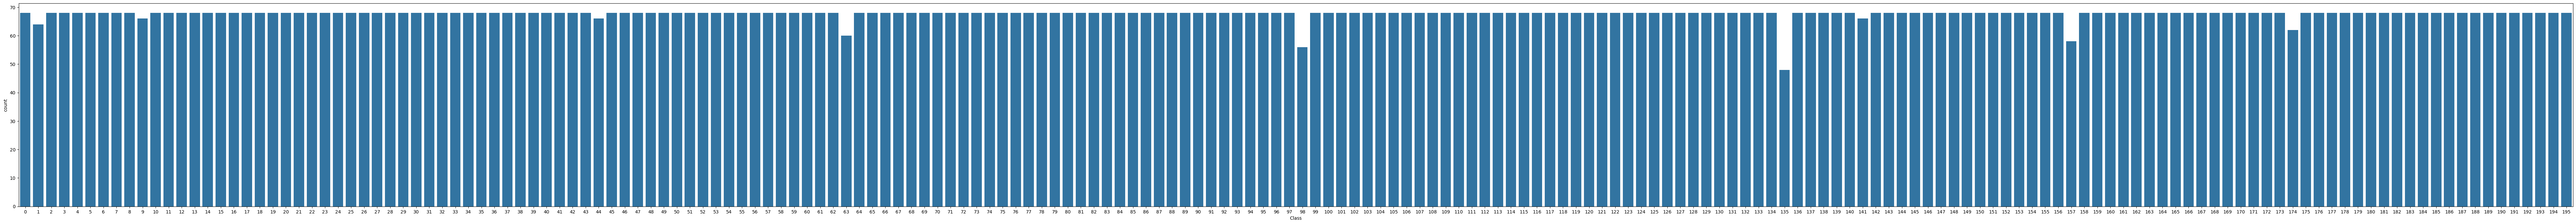

In [101]:
plt.figure(figsize=(100,8))
sns.countplot(data=df_concat_train,x=df_concat_train["Class"])

### Visualizing augmentation image

In [151]:
annotdf=df_aug.sample(10)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


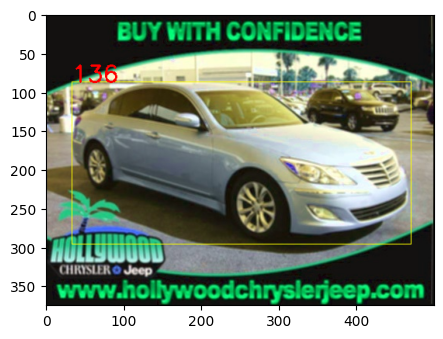

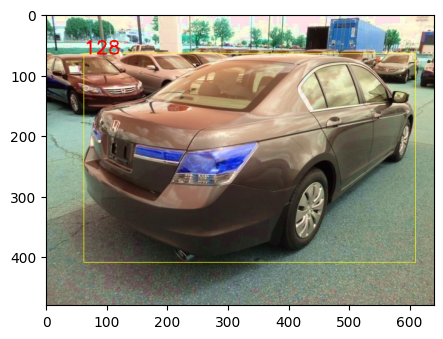

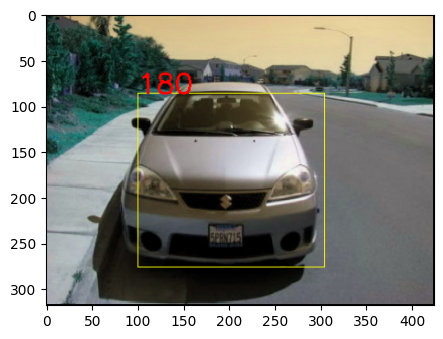

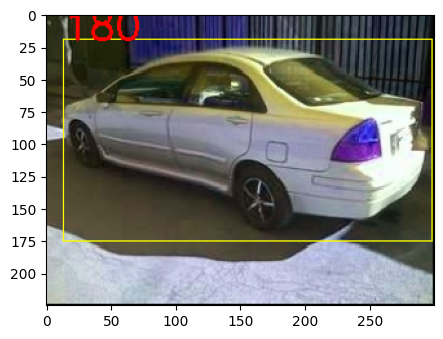

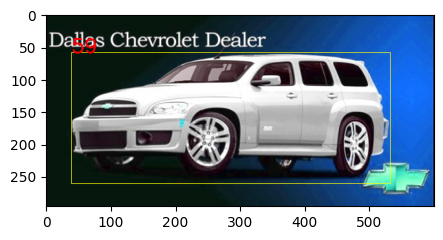

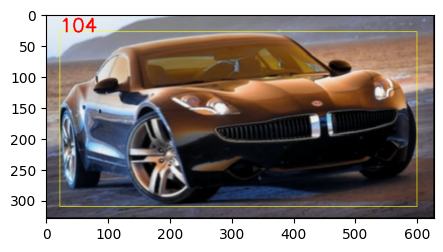

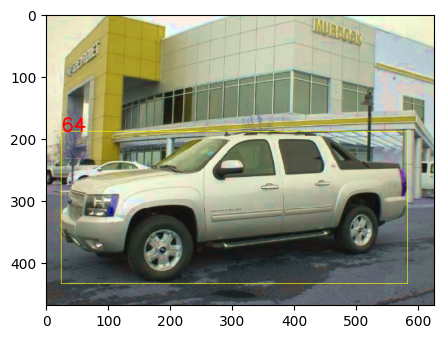

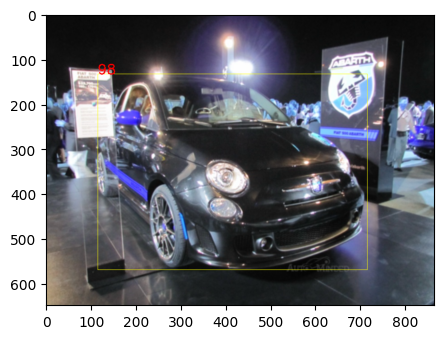

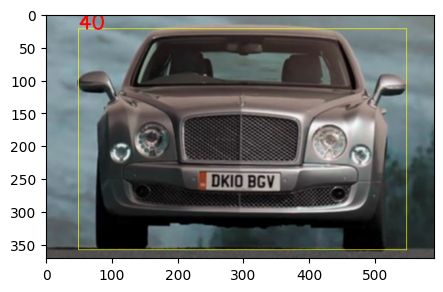

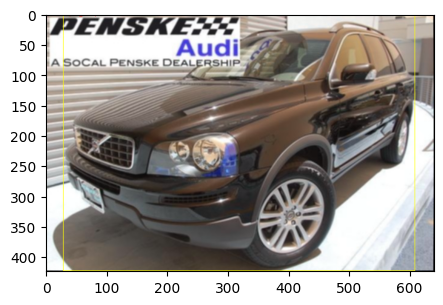

In [152]:
for i in annotdf.iterrows():
    x1=int(i[1]["x1"])
    x2=int(i[1]["x2"])
    y1=int(i[1]["y1"])
    y2=int(i[1]["y2"])
    name=i[1]["image"]
    classid=int(i[1]["Class"])
    try:
        annotaion(x1,y1,x2,y2,name,classid)
    except:
        pass

### Plot of number of images we augmented for each class to handle class imbalance

<Axes: xlabel='Class', ylabel='count'>

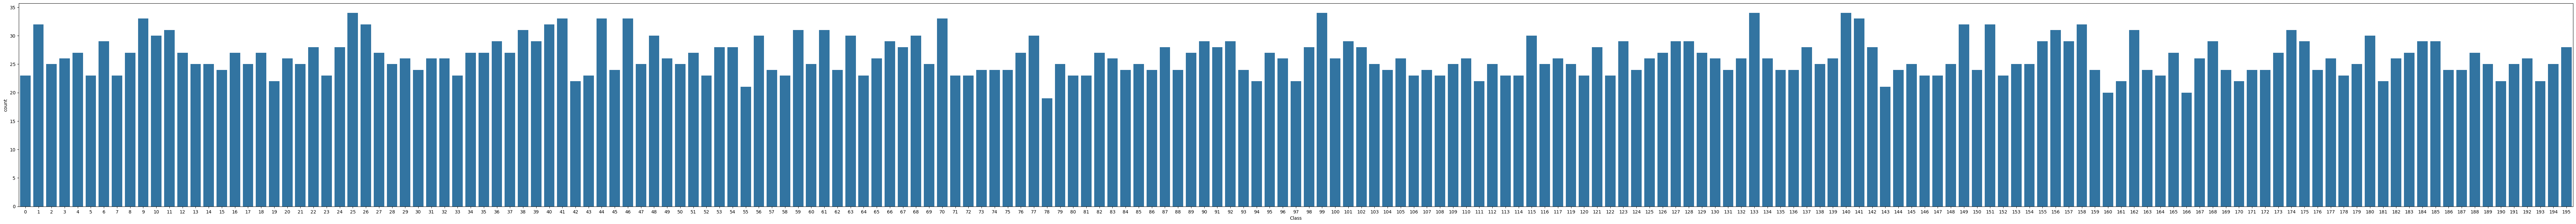

In [102]:
plt.figure(figsize=(100,8))
sns.countplot(data=df_aug,x="Class")

In [103]:
counterdict[2]

43

### splitting validation data from training data

In [104]:
import pandas as pd

def split_and_remove(df, class_column, percentage=1, random_state=None):
    
    # Group by class and randomly sample the specified percentage
    sampled_df = df.groupby(class_column).apply(
        lambda x: x.sample(frac=percentage / 100, random_state=random_state)
    ).reset_index(drop=True)

    # Drop sampled rows from the original DataFrame
    remaining_df = df.drop(sampled_df.index)

    return sampled_df, remaining_df

In [105]:
df_valid,df_train_rem=split_and_remove(df_concat_train,"Class")

/tmp/ipykernel_222496/349346263.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(class_column).apply(


In [106]:
df_valid.head(2)

,x1,y1,x2,y2,Class,image,path,height,width,centre_x,centre_y,w,h
0,5,8,91,59,0,05657.jpg,cars_train/cars_train,72,96,0.500000,0.465278,0.895833,0.708333
1,38,92,420,241,1,05930_aug.jpg,cars_train/cars_train,275,440,0.520455,0.605455,0.868182,0.541818


### creating validation image from training image

In [107]:
def create_valid_data(df_valid):
    try:
        os.makedirs("cars_valid/cars_valid")
    except:
        pass
    name=list(df_valid["image"])
    for i in name:
        shutil.move(train_path+"/"+i,"cars_valid/cars_valid/"+i)
    print("valid_image_created")

In [108]:
create_valid_data(df_valid)

valid_image_created


In [109]:
train_label_path="cars_train/labels"
test_label_path="cars_test/labels"

valid_label_path="cars_valid/labels"

In [110]:
try:
    os.makedirs(train_label_path)
except:
    pass
try:
    os.makedirs(test_label_path)
except:
    pass
try:
    os.makedirs(valid_label_path)
except:
    pass

### creating training labels

In [111]:
for i in df_train_rem.iterrows():
    yolo_annotations=[]
    class_id=i[1]["Class"]
    x_center=i[1]["centre_x"]
    
    y_center=i[1]["centre_y"]
    
    width=i[1]["w"]
    height=i[1]["h"]
    name=i[1]["image"].split(".")[0]+".txt"
    yolo_annotations.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")
    with open(train_label_path+"/"+name, "w") as f:
            f.write("\n".join(yolo_annotations))

### creating validation labels

In [112]:
for i in df_valid.iterrows():
    yolo_annotations=[]
    class_id=i[1]["Class"]
    x_center=i[1]["centre_x"]
    
    y_center=i[1]["centre_y"]
    
    width=i[1]["w"]
    height=i[1]["h"]
    name=i[1]["image"].split(".")[0]+".txt"
    yolo_annotations.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")
    with open(valid_label_path+"/"+name, "w") as f:
            f.write("\n".join(yolo_annotations))

### creatig testing labels


In [113]:
for i in df_test.iterrows():
    yolo_annotations=[]
#     class_id=i[1]["Class"]
    x_center=i[1]["centre_x"]
    
    y_center=i[1]["centre_y"]
    
    width=i[1]["w"]
    height=i[1]["h"]
    name=i[1]["image"].split(".")[0]+".txt"
    yolo_annotations.append(f"{x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")
    with open(test_label_path+"/"+name, "w") as f:
            f.write("\n".join(yolo_annotations))

In [114]:
df_test.head(2)

,Unnamed: 0,x1,y1,x2,y2,image,path,height,width,centre_x,centre_y,w,h
0,0,30,52,246,147,00001.jpg,cars_train/cars_train,400,600,0.230000,0.248750,0.360000,0.237500
1,1,100,19,576,203,00002.jpg,cars_train/cars_train,675,900,0.375556,0.164444,0.528889,0.272593


### Removing valid images and labels from training folder

In [115]:
def remove_valid_from_train():
    valid_path="cars_valid/cars_valid/"
    train_path_img="cars_train/cars_train/"
    labels="cars_train/labels/"
    valid_images=os.listdir(valid_path)
    for i in valid_images:
        try:
            os.remove(train_path_img+i)
            
        except Exception as ex:
            print(ex)
        try:
            
            os.remove(labels+i.split(".")[0]+".txt")
        except Exception as ex:
            print("label=>",ex)
            
            

In [116]:
remove_valid_from_train()

[Errno 2] No such file or directory: 'cars_train/cars_train/00909_aug.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/02856_aug.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/06071_aug.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/06283.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/05930_aug.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/07538_aug.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/07902.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/02839_aug.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/04693.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/06493.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/00780.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/02629.jpg'
[Errno 2] No such file or directory: 'cars_train/cars_train/04519.jpg'
[Errno 2] No such file or directory: 'cars_train/cars

In [117]:
def clean_train():
    valid_path="cars_valid/cars_valid/"
    train_path_img="cars_train/cars_train/"
    labels="cars_train/labels/"
    valid_labels=os.listdir(labels)
    valid_images=os.listdir(train_path_img)
    
    for i in valid_images:
        if i.split(".")[0]+".txt" not in valid_labels:
            print(i)
            try:
                os.remove(train_path_img+i)

            except Exception as ex:
                print(ex)
        

In [118]:
clean_train()

00162.jpg
00117.jpg
01497_aug.jpg
02353_aug.jpg
00023.jpg
03837_aug.jpg
03664_aug.jpg
00121.jpg
02589_aug.jpg
01870_aug.jpg
00181.jpg
06586_aug.jpg
00110.jpg
00097.jpg
00105.jpg
04864_aug.jpg
04753_aug.jpg
03730_aug.jpg
00030.jpg
05281_aug.jpg
00035.jpg
05291_aug.jpg
06591_aug.jpg
05562_aug.jpg
06809_aug.jpg
06228_aug.jpg
00088.jpg
00463_aug.jpg
05813_aug.jpg
00101.jpg
02948_aug.jpg
06937_aug.jpg
06751_aug.jpg
06328_aug.jpg
00122.jpg
00189.jpg
04340_aug.jpg
00183.jpg
00191.jpg
03750_aug.jpg
00054.jpg
00041.jpg
00119.jpg
00174.jpg
07347_aug.jpg
06347_aug.jpg
07485_aug.jpg
00052.jpg
00134.jpg
07586_aug.jpg
00888_aug.jpg
00140.jpg
02474_aug.jpg
00188.jpg
03893_aug.jpg
00170.jpg
00185.jpg
06857_aug.jpg
05927_aug.jpg
06733_aug.jpg
06330_aug.jpg
05825_aug.jpg
00051_aug.jpg
04815_aug.jpg
07121_aug.jpg
00063.jpg
03955_aug.jpg
00083.jpg
07663_aug.jpg
00190.jpg
07071_aug.jpg
03630_aug.jpg
03683_aug.jpg
00628_aug.jpg
00012.jpg
03600_aug.jpg
04026_aug.jpg
02128_aug.jpg
00155.jpg
00165.jpg
00150.jp

In [119]:
train_path_img="cars_train/cars_train/"
len(os.listdir(train_path_img))

12683

In [120]:
train_path_img="cars_train/labels/"
len(os.listdir(train_path_img))

12683